In [ ]:
#install.packages("ggplot2")

In [ ]:
load("nasiona.RData")

str(nasiona)

'data.frame':	203 obs. of  7 variables:
 $ powierzchnia              : num  15.3 14.9 14.3 13.8 16.1 ...
 $ obwod                     : num  14.8 14.6 14.1 13.9 15 ...
 $ zwiezlosc                 : num  0.871 0.881 0.905 0.895 0.903 ...
 $ dlugosc_ziarna            : num  5.76 5.55 5.29 5.32 5.66 ...
 $ szerokosc_ziarna          : num  3.31 3.33 3.34 3.38 3.56 ...
 $ wspolczynnik_asymetrii    : num  2.22 1.02 2.7 2.26 1.35 ...
 $ dlugosc_wyzlobienia_ziarna: num  5.22 4.96 4.83 4.8 5.17 ...
 - attr(*, "na.action")= 'omit' Named int [1:18] 8 9 37 38 63 64 73 112 141 142 ...
  ..- attr(*, "names")= chr [1:18] "8" "9" "37" "38" ...


In [ ]:
summary(nasiona)

  powierzchnia       obwod         zwiezlosc      dlugosc_ziarna 
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899  
 1st Qu.:12.33   1st Qu.:13.46   1st Qu.:0.8571   1st Qu.:5.265  
 Median :14.38   Median :14.37   Median :0.8734   Median :5.541  
 Mean   :14.91   Mean   :14.59   Mean   :0.8709   Mean   :5.640  
 3rd Qu.:17.45   3rd Qu.:15.80   3rd Qu.:0.8871   3rd Qu.:6.002  
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675  
 szerokosc_ziarna wspolczynnik_asymetrii dlugosc_wyzlobienia_ziarna
 Min.   :2.630    Min.   :0.7651         Min.   :4.519             
 1st Qu.:2.954    1st Qu.:2.5700         1st Qu.:5.045             
 Median :3.242    Median :3.6310         Median :5.228             
 Mean   :3.264    Mean   :3.7104         Mean   :5.420             
 3rd Qu.:3.564    3rd Qu.:4.7990         3rd Qu.:5.879             
 Max.   :4.033    Max.   :8.4560         Max.   :6.550             

In [ ]:
dane <- nasiona[, c("powierzchnia", "obwod")]


dane_stnd <- scale(dane)
colnames(dane_stnd) <- c("powierzchnia_stnd", "obwod_stnd")

summary(dane_stnd)

 powierzchnia_stnd   obwod_stnd     
 Min.   :-1.4783   Min.   :-1.6633  
 1st Qu.:-0.8824   1st Qu.:-0.8579  
 Median :-0.1803   Median :-0.1670  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8728   3rd Qu.: 0.9286  
 Max.   : 2.1486   Max.   : 2.0317  

In [ ]:
dist_matrix <- dist(dane_stnd, method = "euclidean")

hc <- hclust(dist_matrix, method = "ward.D2")

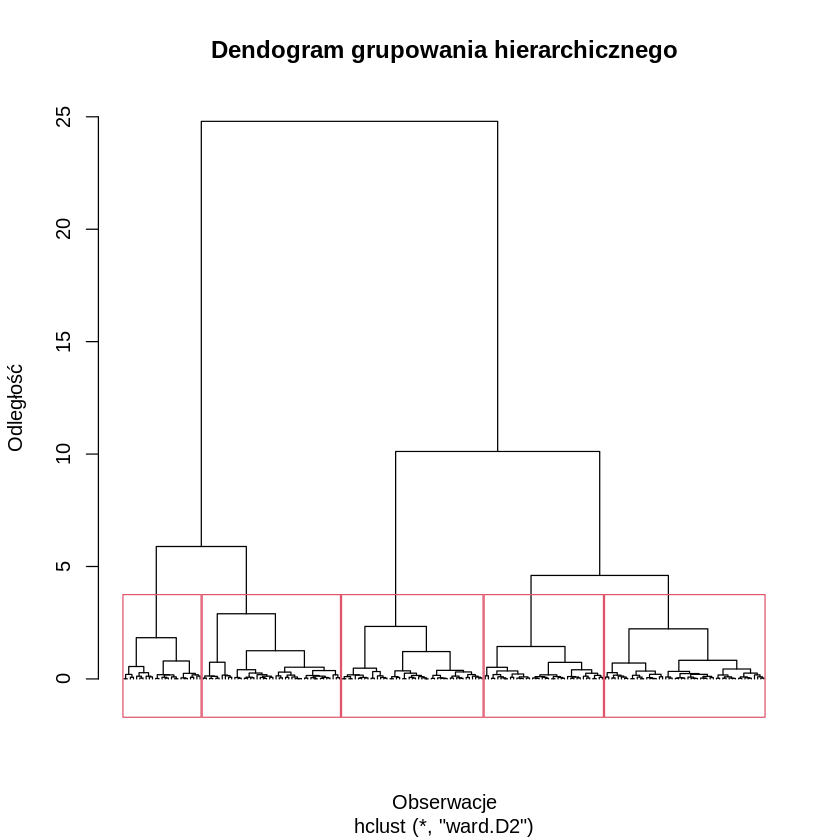

In [ ]:
plot(hc, main = "Dendogram grupowania hierarchicznego", xlab = "Obserwacje", ylab = "Odległość", hang = -1, labels = FALSE)
rect.hclust(hc, k = 5)

In [ ]:
grupy <- cutree(hc, k = 5)
dane_grouped <- cbind(dane_stnd, grupa = grupy)

In [ ]:
group_mean <- aggregate(dane_grouped, by = list(grupa = grupy), FUN = mean)
group_pop <- table(grupy)

print("Liczebności grup")
print(group_pop)

print("Średnie wartości w grupach")
data.frame(group_mean)

[1] "Liczebności grup"
grupy
 1  2  3  4  5 
45 51 25 38 44 
[1] "Średnie wartości w grupach"


grupa,powierzchnia_stnd,obwod_stnd,grupa.1
<int>,<dbl>,<dbl>,<dbl>
1,-0.009076639,-0.01089793,1
2,-0.728424938,-0.72099732,2
3,0.729453385,0.75586769,3
4,-1.209929675,-1.22534859,4
5,1.484070763,1.47563237,5


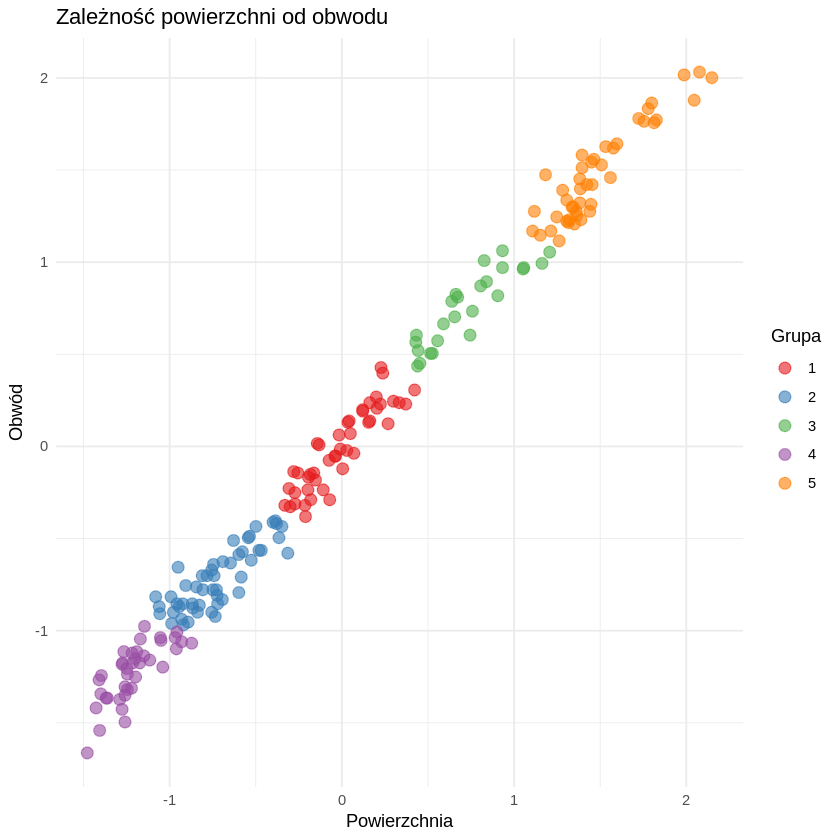

In [ ]:
library(ggplot2)
wykres_zaleznosci <- ggplot(dane_grouped, aes(x = powierzchnia_stnd, y = obwod_stnd, color = factor(grupa))) +
  geom_point(size = 3, alpha = 0.6) +
  labs(title = "Zależność powierzchni od obwodu", x = "Powierzchnia", y = "Obwód", color = "Grupa") +
  theme_minimal() +
  scale_color_brewer(palette = "Set1")

print(wykres_zaleznosci)